In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
data = pd.read_csv('results.csv')
data['size'] = data['size'].astype(int)
markers = [".",",","o","v","^","<",">","1","2","3","4","8","s","p","P","*","h","H","+","x","X","D","d","|","_"]

In [4]:
data.head()

,model,bert_type,dict,case,size,micro_avg,macro_avg,mc_30,mc_30_oov,men_tr_3k,...,simverb_3500_oov,ws_353_all,ws_353_all_oov,ws_353_rel,ws_353_rel_oov,ws_353_sim,ws_353_sim_oov,yp_130,yp_130_oov,total_found
0,bert_2nd_to_last,avg,all,cased,768,0.465,0.547,0.794,0%,0.605,...,0%,0.501,0%,0.423,0%,0.591,0%,0.500,0%,11624
1,bert_2nd_to_last,avg,all,uncased,768,0.467,0.555,0.794,0%,0.605,...,0%,0.537,4%,0.485,5%,0.593,3%,0.500,0%,11587
2,bert_2nd_to_last,avg,dict,cased,768,0.408,0.479,0.757,0%,0.510,...,0%,0.409,0%,0.365,0%,0.473,0%,0.465,0%,11624
3,bert_2nd_to_last,avg,dict,uncased,768,0.482,0.558,0.861,0%,0.599,...,0%,0.479,0%,0.409,0%,0.588,0%,0.570,0%,11624
4,bert_2nd_to_last,avg,yourdict,cased,768,0.432,0.525,0.819,0%,0.598,...,0%,0.527,0%,0.413,0%,0.625,0%,0.469,0%,11624


In [38]:
data.columns

Index(['model', 'dict', 'case', 'size', 'micro_avg', 'macro_avg', 'mc_30',
       'mc_30_oov', 'men_tr_3k', 'men_tr_3k_oov', 'mturk_287', 'mturk_287_oov',
       'mturk_771', 'mturk_771_oov', 'rg_65', 'rg_65_oov', 'rw_stanford',
       'rw_stanford_oov', 'simlex999', 'simlex999_oov', 'simverb_3500',
       'simverb_3500_oov', 'ws_353_all', 'ws_353_all_oov', 'ws_353_rel',
       'ws_353_rel_oov', 'ws_353_sim', 'ws_353_sim_oov', 'yp_130',
       'yp_130_oov', 'total_found'],
      dtype='object')

In [3]:
data['model'].unique()

array(['bert_2nd_to_last', 'bert_2nd_to_last_elmo', 'bert_first',
       'bert_first_elmo', 'bert_last', 'bert_last_elmo',
       'bert_one_sentence_2nd_to_last', 'bert_one_sentence_first',
       'bert_one_sentence_last', 'bert_one_sentence_sum_all_12',
       'bert_one_sentence_sum_last_four', 'bert_sum_all_12',
       'bert_sum_all_12_elmo', 'bert_sum_last_four',
       'bert_sum_last_four_elmo', 'bert_word_2nd_to_last',
       'bert_word_first', 'bert_word_last', 'bert_word_sum_all_12',
       'bert_word_sum_last_four', 'd2v_50M', 'd2v_enwiki',
       'd2v_enwiki_100_7', 'dft_50M', 'dft_enwiki', 'elmo_dict', 'ft_50M',
       'glove_100_ws12', 'glove_100_ws12_elmo', 'glove_100_ws15',
       'glove_100_ws15_elmo', 'glove_100_ws3', 'glove_100_ws3_elmo',
       'glove_200_ws12', 'glove_200_ws12_elmo', 'glove_200_ws15',
       'glove_200_ws15_elmo', 'glove_200_ws3', 'glove_200_ws3_elmo',
       'glove_300_ws12', 'glove_300_ws12_elmo', 'glove_300_ws15',
       'glove_300_ws15_elmo', 'glo

## BERT

In [20]:
data_bert = data[(data['dict'] != '-') & (data['model'].str.contains("elmo")!= True)]

In [22]:
data_bert

,model,bert_type,dict,case,size,micro_avg,macro_avg,mc_30,mc_30_oov,men_tr_3k,...,simverb_3500_oov,ws_353_all,ws_353_all_oov,ws_353_rel,ws_353_rel_oov,ws_353_sim,ws_353_sim_oov,yp_130,yp_130_oov,total_found
0,bert_2nd_to_last,avg,all,cased,768,0.465,0.547,0.794,0%,0.605,...,0%,0.501,0%,0.423,0%,0.591,0%,0.500,0%,11624
1,bert_2nd_to_last,avg,all,uncased,768,0.467,0.555,0.794,0%,0.605,...,0%,0.537,4%,0.485,5%,0.593,3%,0.500,0%,11587
2,bert_2nd_to_last,avg,dict,cased,768,0.408,0.479,0.757,0%,0.510,...,0%,0.409,0%,0.365,0%,0.473,0%,0.465,0%,11624
3,bert_2nd_to_last,avg,dict,uncased,768,0.482,0.558,0.861,0%,0.599,...,0%,0.479,0%,0.409,0%,0.588,0%,0.570,0%,11624
4,bert_2nd_to_last,avg,yourdict,cased,768,0.432,0.525,0.819,0%,0.598,...,0%,0.527,0%,0.413,0%,0.625,0%,0.469,0%,11624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,bert_sum_last_four,word,all,uncased,768,0.253,0.361,0.581,0%,0.431,...,0%,0.452,0%,0.346,0%,0.517,0%,0.229,0%,11624
116,bert_sum_last_four,word,dict,cased,768,0.229,0.289,0.338,0%,0.385,...,0%,0.351,0%,0.422,0%,0.315,0%,0.248,0%,11624
117,bert_sum_last_four,word,dict,uncased,768,0.253,0.361,0.581,0%,0.431,...,0%,0.452,0%,0.346,0%,0.517,0%,0.229,0%,11624
118,bert_sum_last_four,word,yourdict,cased,768,0.229,0.289,0.338,0%,0.385,...,0%,0.351,0%,0.422,0%,0.315,0%,0.248,0%,11624


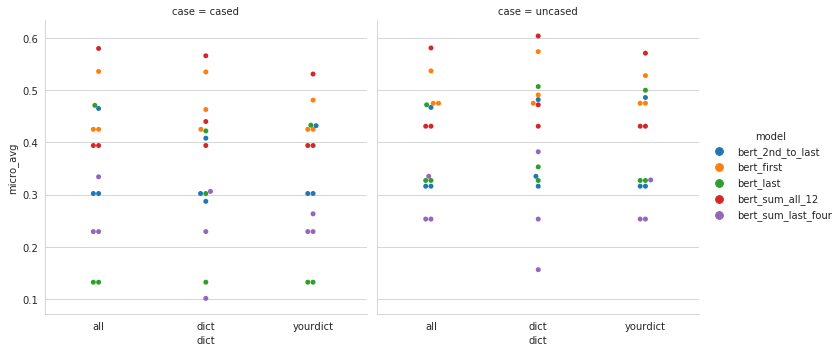

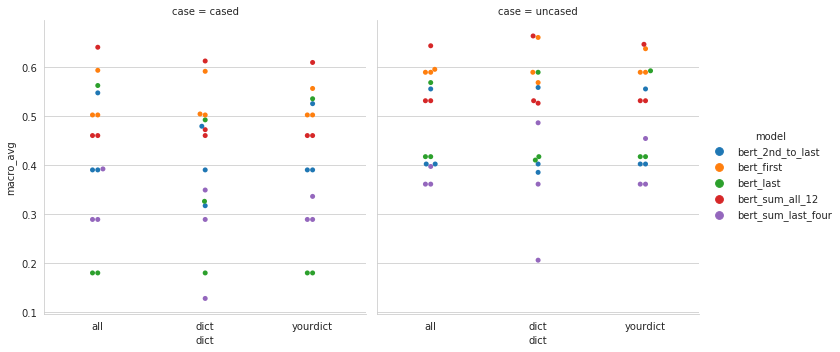

In [24]:
sns.catplot(x='dict', y='micro_avg', col='case', hue='model',data=data_bert, kind='swarm')
sns.catplot(x='dict', y='macro_avg', col='case', hue='model',data=data_bert, kind='swarm')

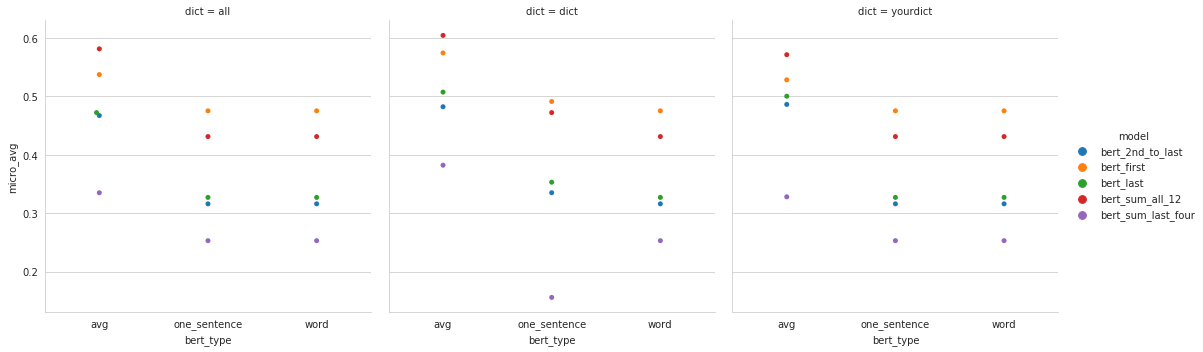

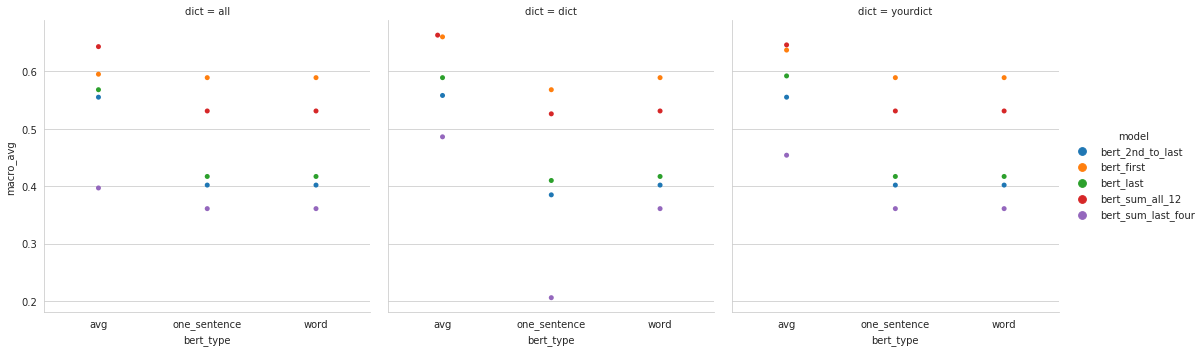

In [27]:
sns.catplot(x='bert_type', y='micro_avg', col='dict', hue='model',data=data_bert[(data_bert['case']=='uncased')], kind='swarm')
sns.catplot(x='bert_type', y='macro_avg', col='dict', hue='model',data=data_bert[(data_bert['case']=='uncased')], kind='swarm')

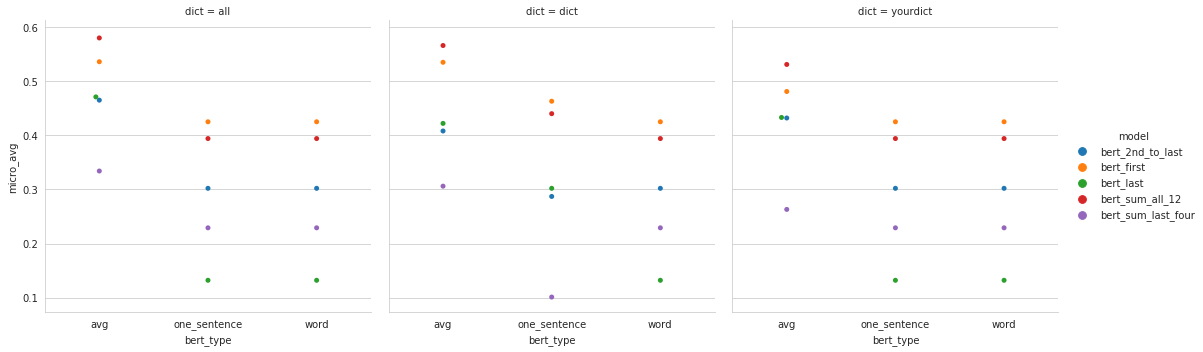

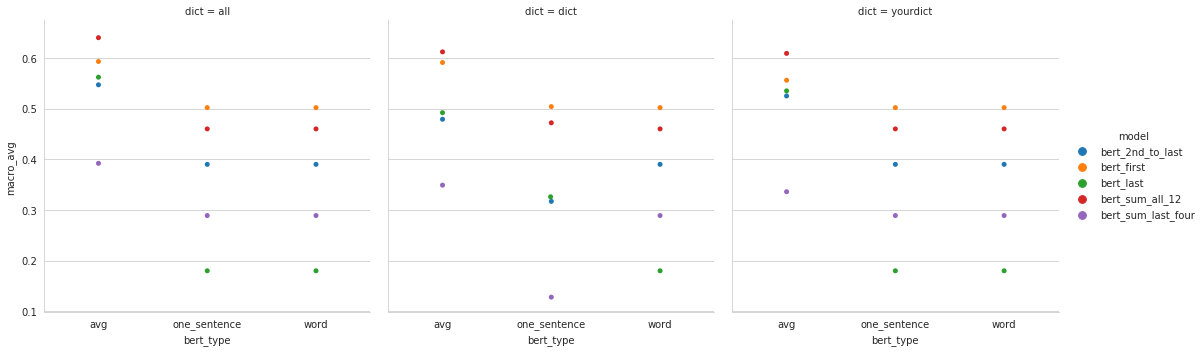

In [28]:
sns.catplot(x='bert_type', y='micro_avg', col='dict', hue='model',data=data_bert[(data_bert['case']=='cased')], kind='swarm')
sns.catplot(x='bert_type', y='macro_avg', col='dict', hue='model',data=data_bert[(data_bert['case']=='cased')], kind='swarm')

## ELMO

In [6]:
data_elmo = data[(data['model'].str.contains("elmo") & (data['dict']=='-'))]
data_elmo_bert = data[(data['model'].str.contains("elmo") & (data['dict']!='-'))]

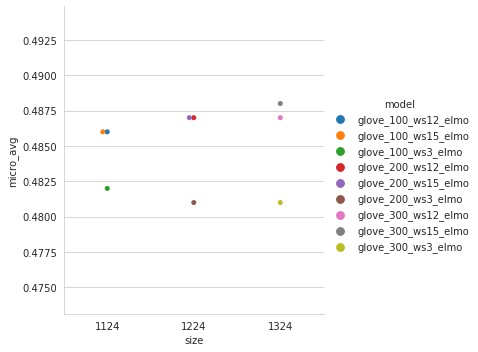

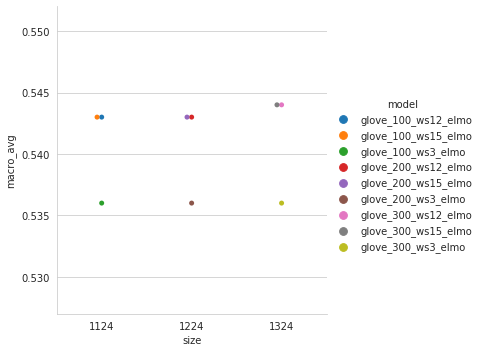

In [11]:
sns.catplot(x='size', y='micro_avg', hue='model', data=data_elmo, kind='swarm')#, markers=markers)
sns.catplot(x='size', y='macro_avg', hue='model', data=data_elmo, kind='swarm')#, markers=markers)

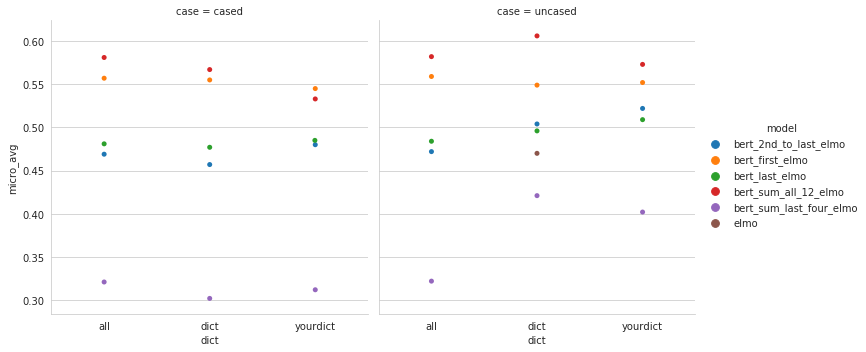

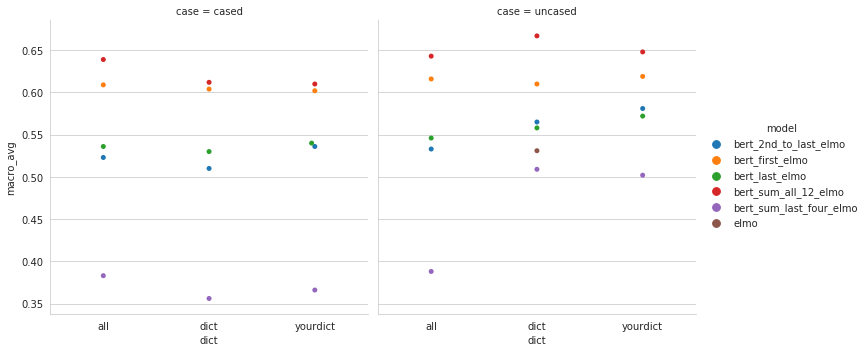

In [18]:
sns.catplot(x='dict', y='micro_avg', col='case', hue='model',data=data_elmo_bert, kind='swarm')
sns.catplot(x='dict', y='macro_avg', col='case', hue='model',data=data_elmo_bert, kind='swarm')

## GLOVE

In [32]:
data_glove = data[(data['model'].str.contains("glove"))&(~data['model'].str.contains("elmo"))]

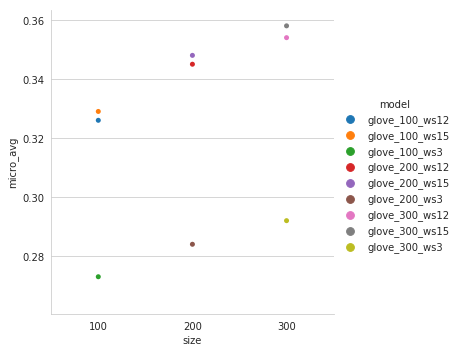

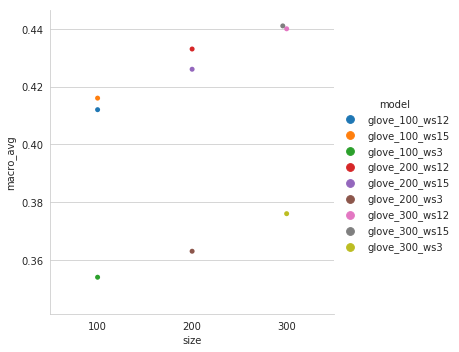

In [36]:
sns.catplot(x='size', y='micro_avg', hue='model',data=data_glove, kind='swarm')
sns.catplot(x='size', y='macro_avg', hue='model',data=data_glove, kind='swarm')

## ALL

In [ ]:
data[(data['case']=='uncased')&(data['dict'].isin(['dict','-']))][['model','size', 'dict', 'macro_avg']].sort_values(['macro_avg'], ascending=False)[:25]

In [59]:
all_micro = data[['model','size', 'dict', 'case', 'micro_avg']].sort_values('micro_avg', ascending=False).groupby('model').head(1)
print(all_micro[:5])
all_macro = data[['model','size', 'dict', 'case', 'macro_avg']].sort_values('macro_avg', ascending=False).groupby('model').head(1)
all_macro[:5]

                    model  size  dict     case  micro_avg
75   bert_sum_all_12_elmo  1792  dict  uncased      0.606
69        bert_sum_all_12   768  dict  uncased      0.604
123               dft_50M   300     -  uncased      0.587
120               d2v_50M   100     -  uncased      0.587
15             bert_first   768  dict  uncased      0.574


,model,size,dict,case,macro_avg
123,dft_50M,300,-,uncased,0.670
120,d2v_50M,100,-,uncased,0.669
75,bert_sum_all_12_elmo,1792,dict,uncased,0.667
69,bert_sum_all_12,768,dict,uncased,0.663
15,bert_first,768,dict,uncased,0.660


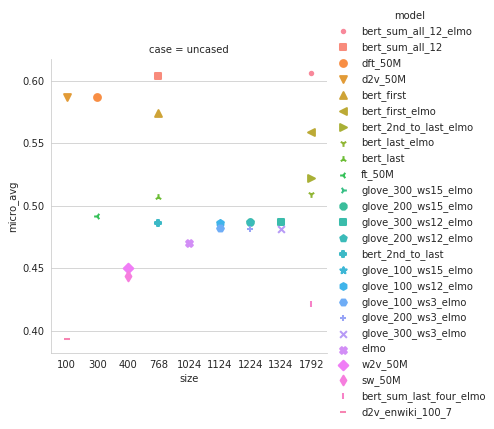

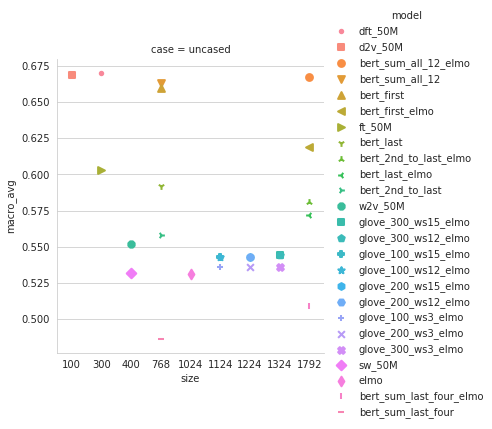

In [60]:
sns.catplot(x='size', y='micro_avg', col='case', hue='model',data=all_micro[:25], kind='point', markers=markers)
sns.catplot(x='size', y='macro_avg', col='case', hue='model',data=all_macro[:25], kind='point', markers=markers)

# Diffvec

In [15]:
diffvec = pd.read_csv('results_diffvec.csv')

In [16]:
diffvec_bert = diffvec[diffvec['model'].str.contains("bert")]
markers = [".",",","o","v","^","<",">","1","2","3","4","8","s","p","P","*","h","H","+","x","X","D","d","|","_"]

In [17]:
diffvec_bert[~diffvec_bert['model'].str.contains("elmo")]

,model,bert_type,dict,case,nclusters,vmeasure
0,bert_2nd_to_last,avg,all,cased,10,0.368
1,bert_2nd_to_last,avg,all,cased,20,0.397
2,bert_2nd_to_last,avg,all,cased,30,0.373
3,bert_2nd_to_last,avg,all,cased,40,0.360
4,bert_2nd_to_last,avg,all,cased,50,0.360
...,...,...,...,...,...,...
723,bert_sum_last_four,word,yourdict,uncased,40,0.284
724,bert_sum_last_four,word,yourdict,uncased,50,0.302
725,bert_sum_last_four,word,yourdict,uncased,60,0.306
726,bert_sum_last_four,word,yourdict,uncased,70,0.312


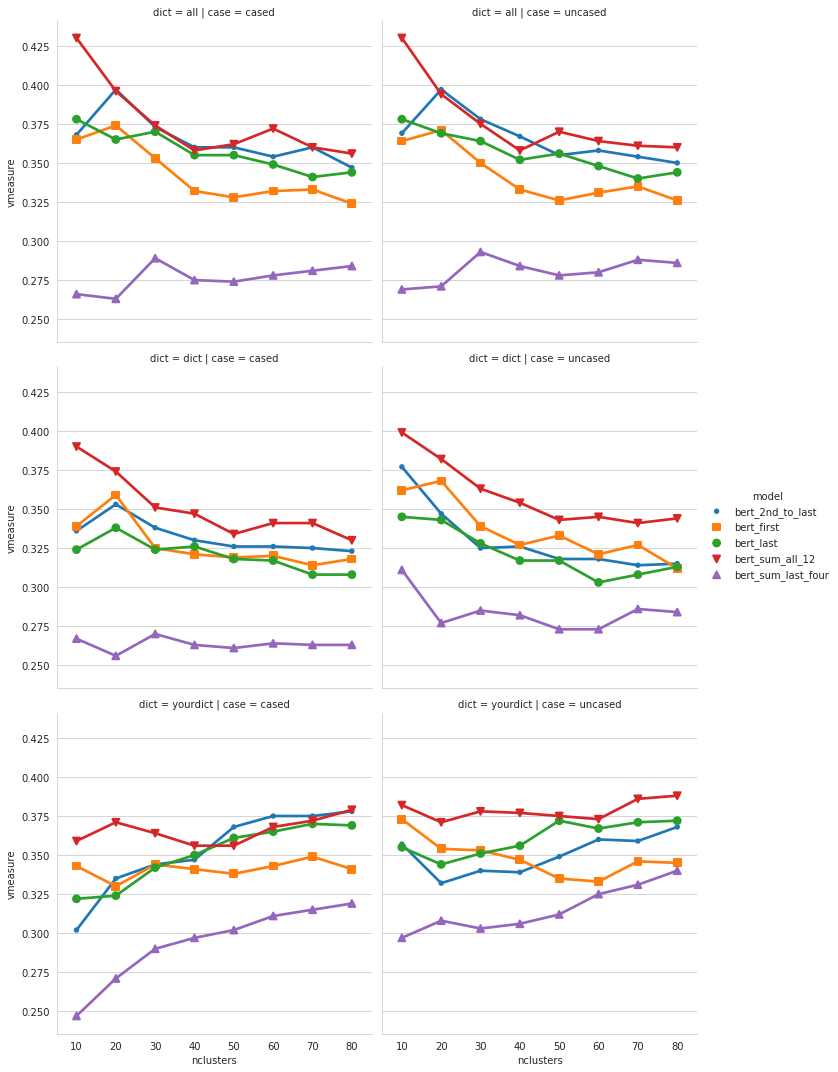

In [18]:
sns.catplot(x='nclusters', y='vmeasure', col='case', row='dict',hue='model',data=diffvec_bert[(~diffvec_bert['model'].str.contains("elmo"))&(diffvec_bert['bert_type']=='avg')], kind='point', markers=markers)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


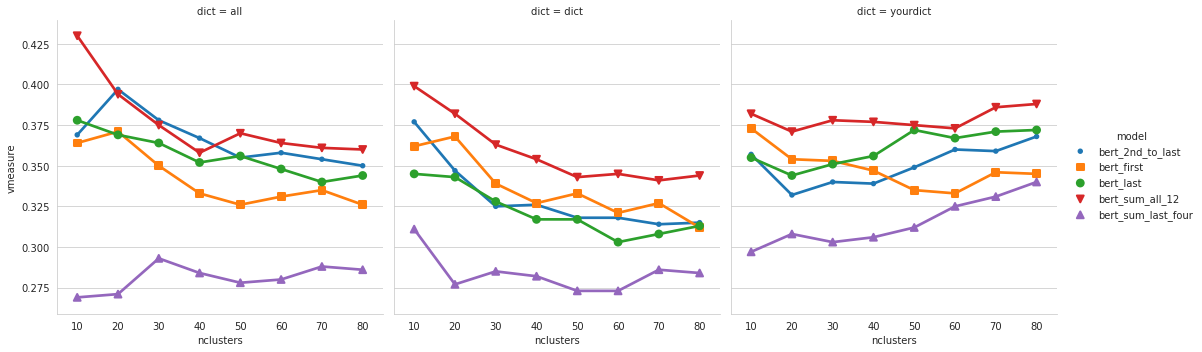

In [19]:
sns.catplot(x='nclusters', y='vmeasure', col='dict', hue='model',data=diffvec_bert[(~diffvec_bert['model'].str.contains("elmo"))&(diffvec_bert['bert_type']=='avg')&(diffvec['case']=='uncased')], kind='point', markers=markers)

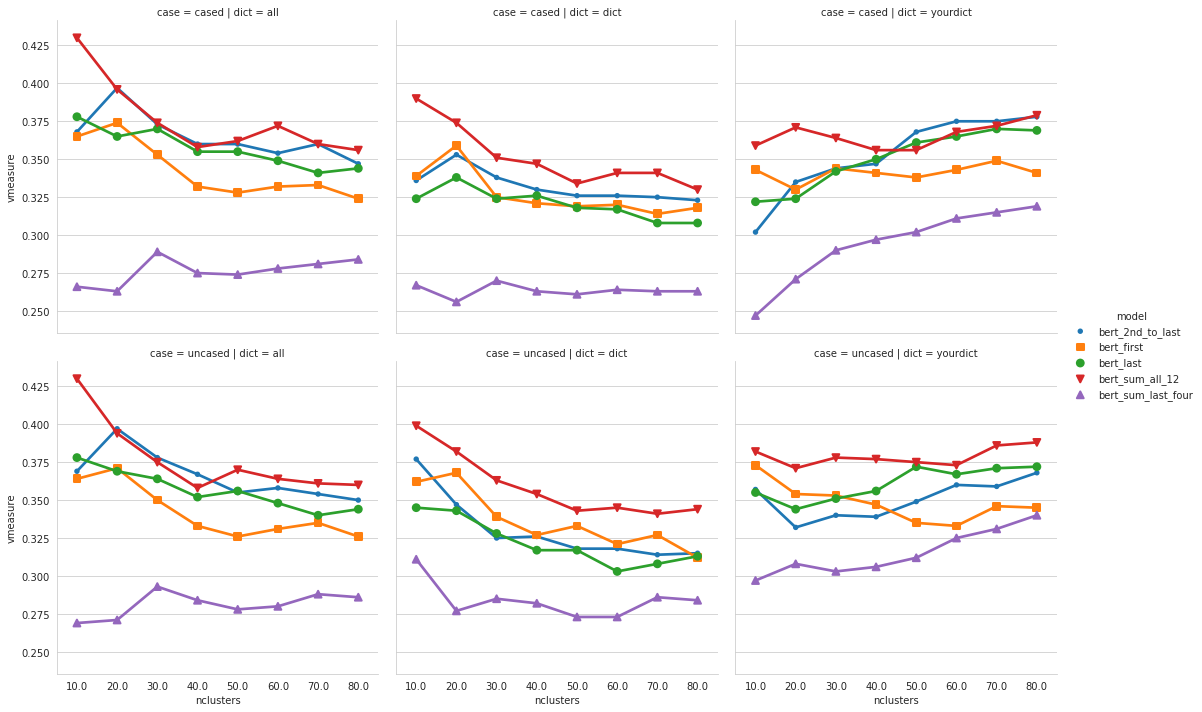

In [12]:
sns.catplot(x='nclusters', y='vmeasure', col='dict', row='case',hue='model',data=diffvec_bert[(~diffvec_bert['model'].str.contains("elmo"))&(diffvec_bert['bert_type']=='avg')], kind='point', markers=markers)

In [20]:
diffvec_glove = diffvec[diffvec['model'].str.contains("glove")]

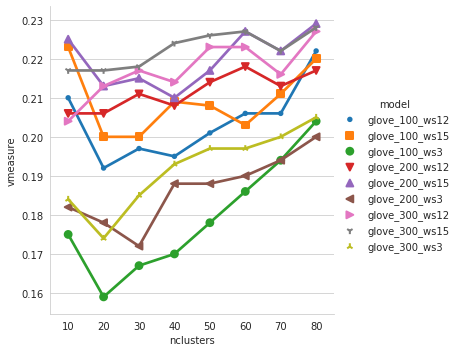

In [21]:
sns.catplot(x='nclusters', y='vmeasure', hue='model',data=diffvec_glove[~diffvec_glove['model'].str.contains("elmo")], kind='point', markers=markers)

In [22]:
diffvec[diffvec['model'].str.contains("elmo")]

,model,bert_type,dict,case,nclusters,vmeasure
280,bert_first_elmo,avg,dict,uncased,10,0.377
281,bert_first_elmo,avg,dict,uncased,20,0.369
282,bert_first_elmo,avg,dict,uncased,30,0.374
283,bert_first_elmo,avg,dict,uncased,40,0.366
284,bert_first_elmo,avg,dict,uncased,50,0.365
...,...,...,...,...,...,...
947,glove_300_ws3_elmo,-,-,uncased,60,0.349
948,glove_300_ws3_elmo,-,-,uncased,70,0.345
949,glove_300_ws3_elmo,-,-,uncased,70,0.345
950,glove_300_ws3_elmo,-,-,uncased,80,0.343


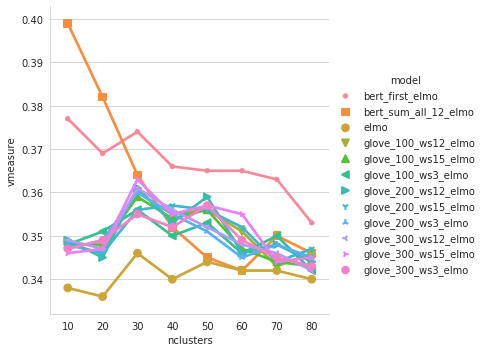

In [23]:
sns.catplot(x='nclusters', y='vmeasure', hue='model',data=diffvec[diffvec['model'].str.contains("elmo")], kind='point', markers=markers)

In [49]:
diffvec['model'].isin(['bert_sum_all_12_elmo', 'bert_first_elmo'])

0      False
1      False
2      False
3      False
4      False
       ...  
955    False
956    False
957    False
958    False
959    False
Name: model, Length: 960, dtype: bool

In [52]:
diffvec_best1 = pd.concat([diffvec[(diffvec['case']=='uncased')&(diffvec['bert_type']).isin(['-', 'avg'])&(diffvec['dict']).isin(['-', 'yourdict'])&(diffvec['model'].isin(['bert_first', 'bert_sum_all_12', 'glove_300_ws15_elmo', 'elmo', 'ft', 'dft', 'w2v', 'ft']))], diffvec[diffvec['model'].isin(['bert_sum_all_12_elmo', 'bert_first_elmo'])]])
diffvec_best2 = pd.concat([diffvec[(diffvec['case']=='uncased')&(diffvec['bert_type']).isin(['-', 'avg'])&(diffvec['dict']).isin(['-', 'dict'])&(diffvec['model'].isin(['bert_first', 'bert_sum_all_12', 'glove_300_ws15_elmo', 'elmo', 'ft', 'dft', 'w2v', 'ft']))], diffvec[diffvec['model'].isin(['bert_sum_all_12_elmo', 'bert_first_elmo'])]])

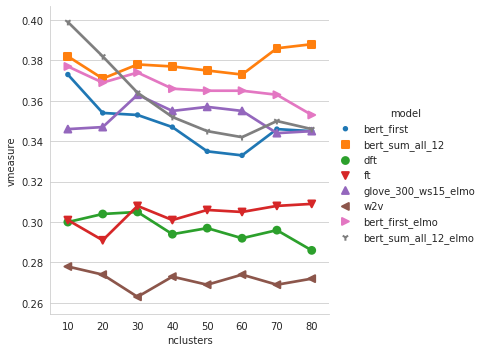

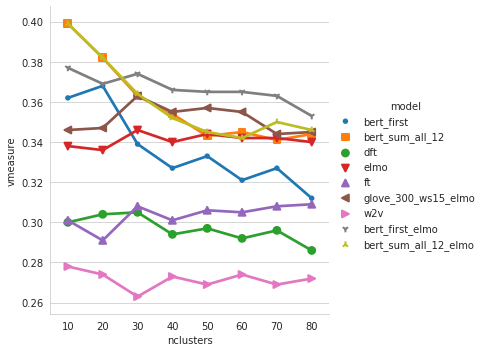

In [53]:
sns.catplot(x='nclusters', y='vmeasure', hue='model',data=diffvec_best1, kind='point', markers=markers)
sns.catplot(x='nclusters', y='vmeasure', hue='model',data=diffvec_best2, kind='point', markers=markers)

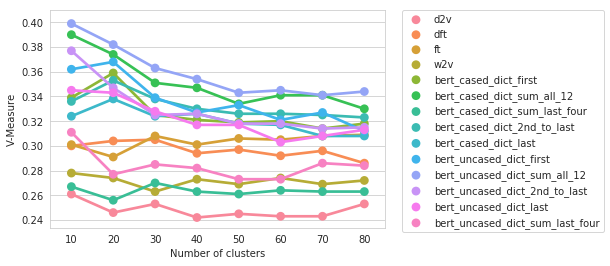

In [81]:
sns.pointplot("nclusters", "vmeasure", data=diffvec, hue='model')
plt.xlabel('Number of clusters')
plt.ylabel('V-Measure')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)